# Financial Mathematics 
### Lab 02: Stochastic processes

The purpose of this class is to generate popular stochastic processes (Poisson, Wiener) trajectories and learn about their behaviours. 

In [2]:
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from math import sqrt

### (a) Poisson process

In [12]:
def poisson_process(n: int, lambd: float = 1):
    """
    Generate a Poisson process.

    Parameters:
    n (int): Number of steps in the process.
    lambd (float): Rate parameter of the Poisson distribution.

    Returns:
    numpy.ndarray: Cumulative sum of Poisson-distributed random variables.
    """
    
    poiss = [np.random.poisson(lambd) for _ in range(n-1)]
    poiss = np.array(poiss)
    res = np.cumsum(poiss)
    res = np.insert(res, 0, 0)
    return res

Trajectory visualization (lambda = 1)

Text(0.5, 1.0, 'Poisson process trajectory')

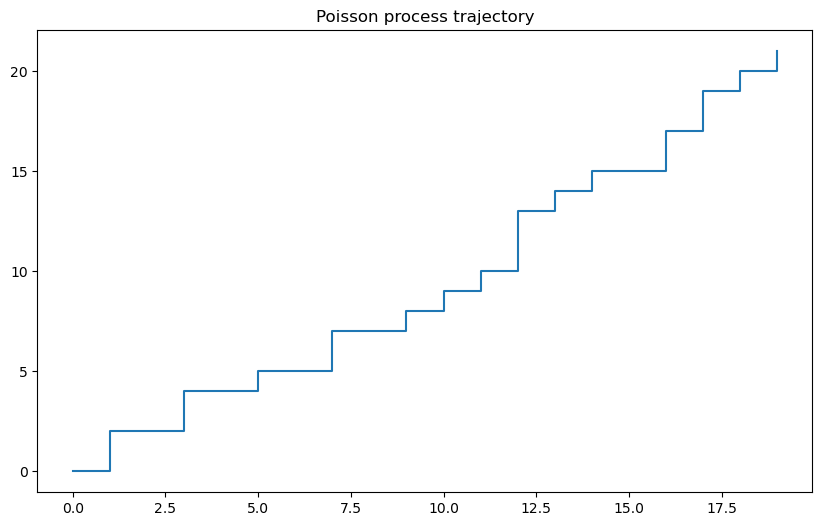

In [16]:
x = range(20)
y = poisson_process(20)

plt.figure(figsize=(10,6))
plt.step(x,y, where='post')
plt.title("Poisson process trajectory")

Trajectory visualization (different lambdas)

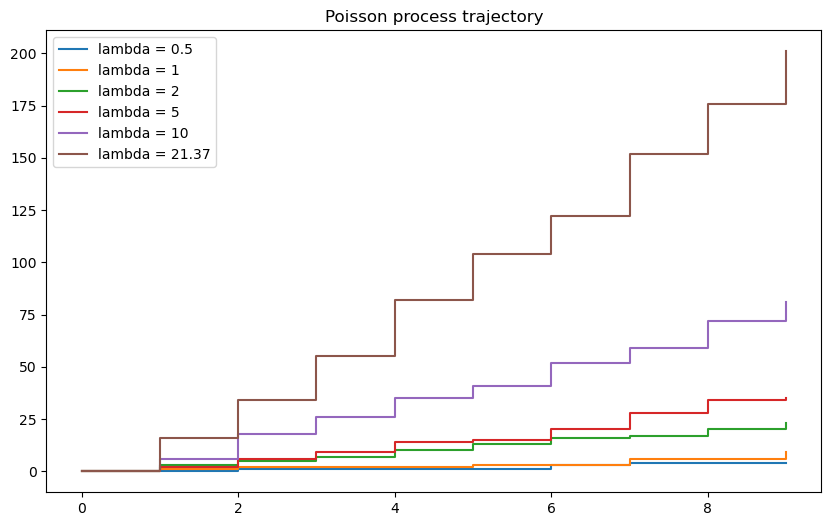

In [17]:
n = 10
lambdas = [0.5, 1, 2, 5, 10, 21.37]
x = range(n)

plt.figure(figsize=(10,6))
for i in range(len(lambdas)):
    y = poisson_process(n, lambd = lambdas[i])
    plt.step(x, y, label = f"lambda = {lambdas[i]}", where='post')
plt.title("Poisson process trajectory")
plt.legend()

### (b) Wiener process

Now we would like to generate Wiener's process and visualize it.

In [18]:
def wiener(T: float, n: int) -> list:
    assert T/n < 1, "interval T/n should be < 1"
    res = [None] * n
    interval = T/n
    
    for i in range(n):
        if i == 0:
            res[i] = 0
        else:
            z = np.random.normal(0,1)
            w = res[i-1] + np.sqrt(interval*i - interval*(i-1)) * z
            res[i] = w
    return res
    

Example

Text(0.5, 1.0, "Wiener's process trajectory")

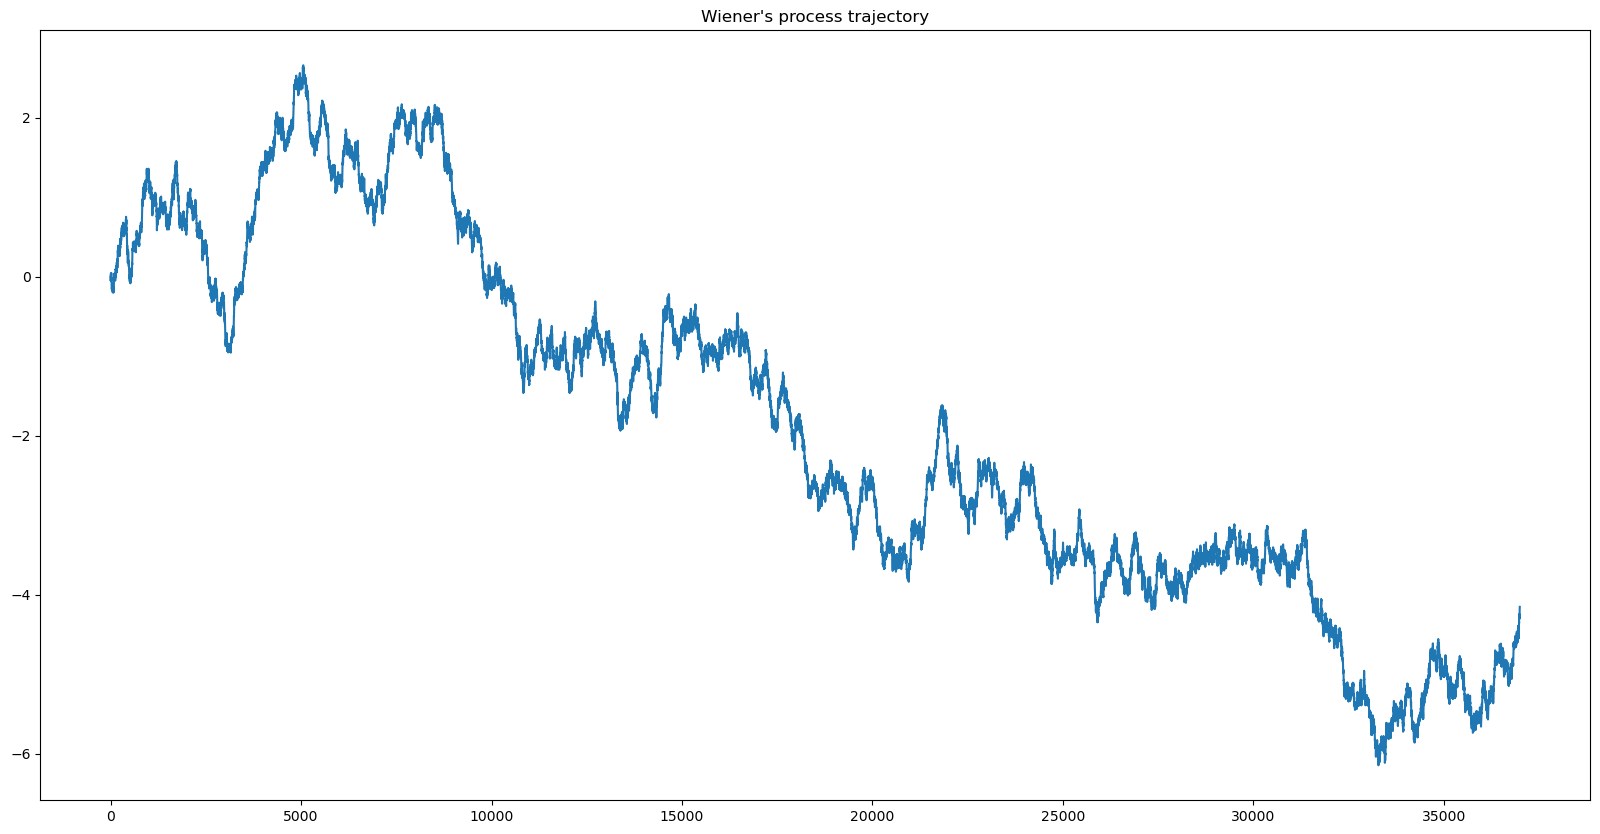

In [19]:
T, n = 21, 37000
interval = T/n
x = [interval*i for i in range(n)]

plt.figure(figsize=(20,10))
plt.plot(wiener(T, n))
plt.title("Wiener's process trajectory")

In [20]:
def cholesky(S): #S - macierz kwadratowa dodatnio okreslona
    n = len(S)
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if (i == k):
                L[i][k] = sqrt(S[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (S[i][k] - tmp_sum))
    return L


def wiener2(T: int, n: int): 
    assert T/n < 1, "interval T/n must be <1"
    interval = T/n
    t = [(interval * i) for i in range(n)] 
    sigma = [[min(t[i], t[j]) for j in range(n)] for i in range(n)]
    eigvals = np.linalg.eig(np.array(sigma))[0]
    for eigval in eigvals:
        if eigval == 0:
            raise ValueError("Sigma matrix has eigenvalue = 0")
    
    A = cholesky(sigma)
    x = np.random.normal(0,1,n)
    
    res = np.matmul(np.array(A), x)   
    return res

    

In [21]:
wiener2(2, 1000)

ValueError: Sigma matrix has eigenvalue = 0

Becuase of the problem with positive definiteness of matrix Sigma, we need to modify the algoruthm in the easiest possible way: add small positive value to the elements on the matrix diagonal.

In [23]:
def wiener3(T: float, n: int, eps = 10e-6):
    assert T/n < 1, "interval T/n must be <1"
    interval = T/n
    t = [(interval * i) for i in range(n)] 
    sigma = [[min(t[i], t[j]) for j in range(n)] for i in range(n)]
    
    for i in range(n):
        sigma[i][i] += eps
    
    A = cholesky(sigma)
    x = np.random.normal(0,1,n)
    
    res = np.matmul(np.array(A), x)   
    return res



Example

Text(0.5, 1.0, "Wiener's process trajectory (method No. 2)")

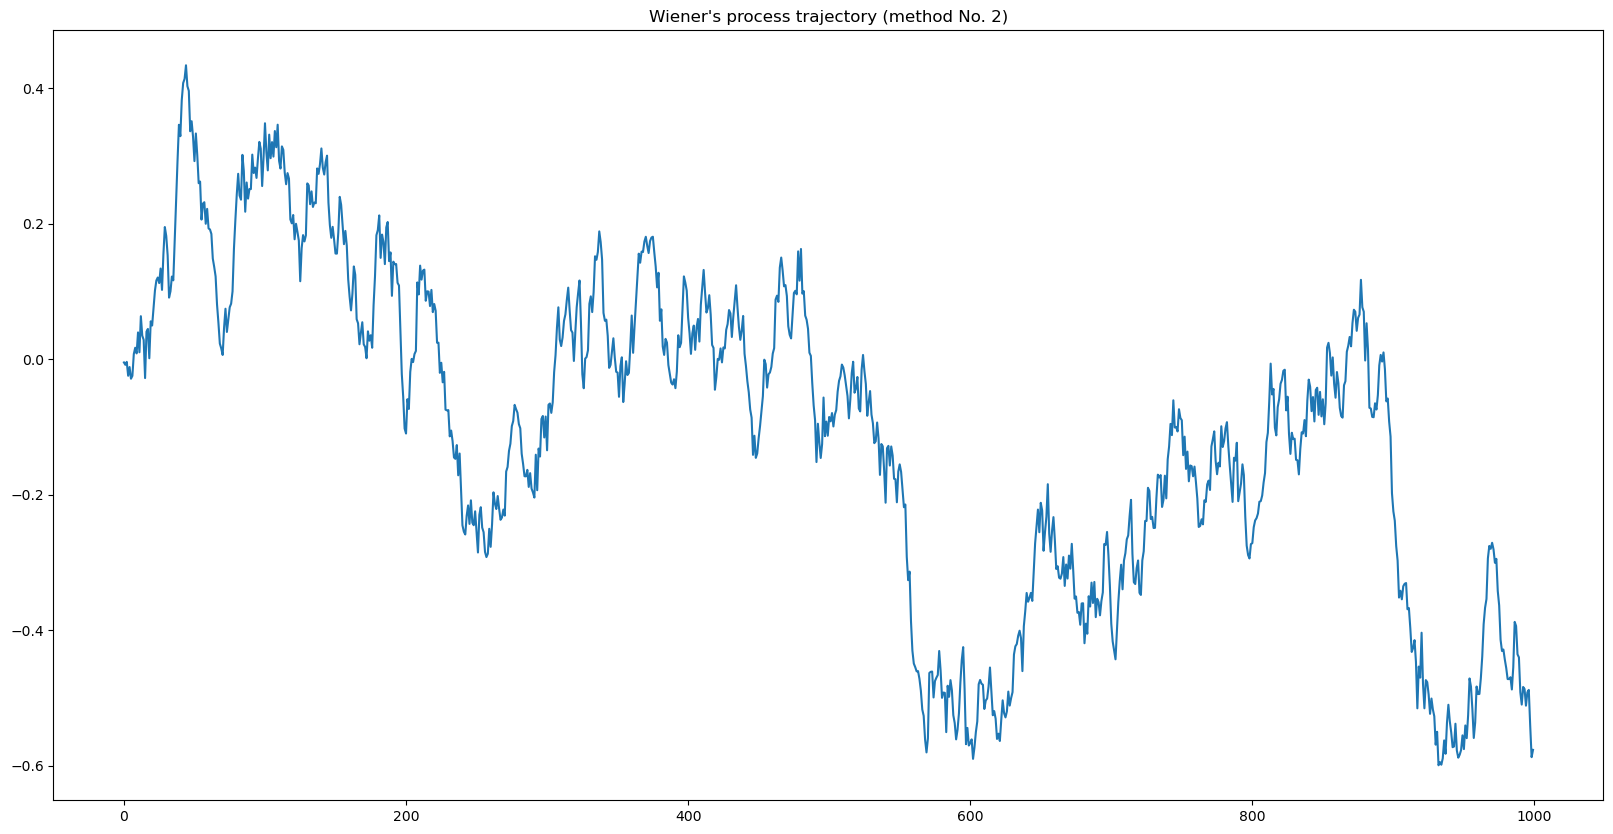

In [24]:
T, h = 1, 1000
x = [h*i for i in range(int(T/h))]
plt.figure(figsize=(20,10))
plt.plot(wiener3(T, h))
plt.title("Wiener's process trajectory (method No. 2)")

#### Execution time comparison

In [25]:
t0 = time.time()
wiener(1, 1000)
t1 = time.time()
print(f"First method: {t1-t0:.3f}")

t0 = time.time()
wiener3(1, 1000)
t1 = time.time()
print(f"Second method: {t1-t0:.3f}")

First method: 0.003
Second method: 6.930


First method: 0.003  --- *wiener function*  
Second method: 6.930 --- *wiener3 function*  

Using Cholesky decomposition results in a great deal longer calculations time.

### (c) two dimensional Wiener process (independent components)

In [28]:
def wiener_2d(T: float, n: int) -> tuple:
    w1 = wiener(T, n)
    w2 = wiener(T, n)
    return w1, w2

Example

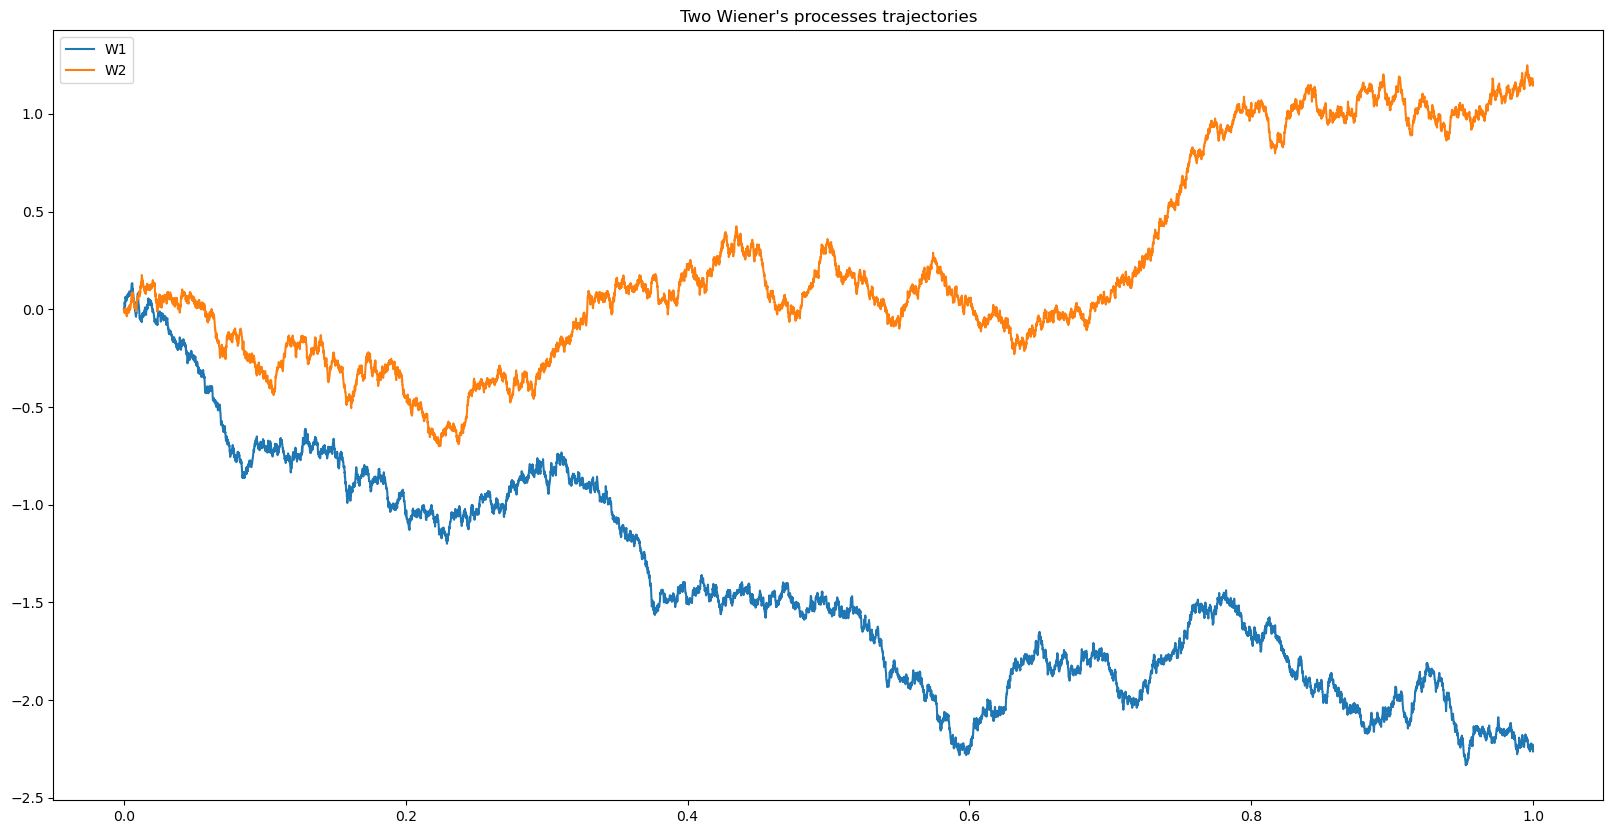

In [30]:
T, n = 1, 10_000
interval = T/n
x = [interval*i for i in range(n)]
w = wiener_2d(T,n)
y = w[0]
z = w[1]

plt.figure(figsize=(20,10))
plt.plot(x, y, label = "W1");
plt.plot(x, z, label = "W2");
plt.legend();
plt.title("Two Wiener's processes trajectories");

2D visualization

Text(0.5, 1.0, '2D Wiener process')

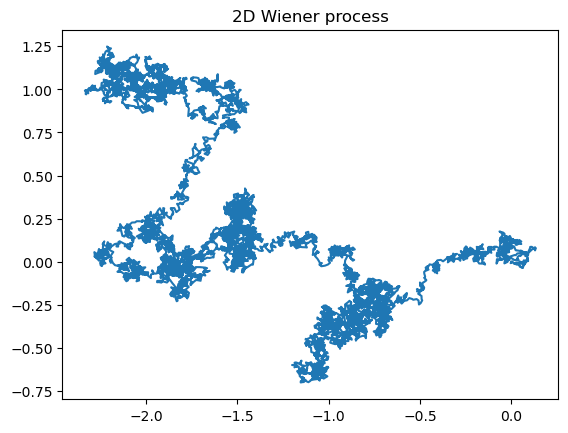

In [31]:
plt.plot(y,z);
plt.title("2D Wiener process")

The 2D Wiener'sprocess resembels random walk.

In [32]:
fig = px.line_3d(x=x, y=y, z=z)
fig.show()

Here, x axis represents time.

#### Random walk in $\mathbb{R}^3$

In [34]:
x = wiener(1, 10_000)
y = wiener(1, 10_000)
z = wiener(1, 10_000)

fig = px.line_3d(x=x, y=y, z=z)
fig.show()

### (d) Correlated Wiener process

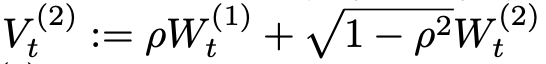

Let's prove that $V_t^{2}$ ($=: V_t$ for simplicity) is a Wiener process.
1. $V_t$ is a gaussian process as it is an affine tranformation of gaussian (=> Wiener) processes:
$$
V_t =
\begin{bmatrix} \rho & \sqrt{1 - \rho^2} \end{bmatrix}
\begin{bmatrix} W_t^{(1)} \\ W_t^{(2)} \end{bmatrix}
$$
2. its mean function is 0 because 
$$\mathbb{E}[V_t] = \mathbb{E}[V_t] =  \mathbb{E}[ \rho W_t^{(1)} + \sqrt{1 - \rho^2} W_t^{(2)}] =  \rho \mathbb{E}[W_t^{(1)}] + \sqrt{1 - \rho^2}   \mathbb{E}[W_t^{(2)}] = 0$$

3. for $s<t$ its covariance function $$\text{Cov}(V_s, V_t) = \text{Cov}(\rho W_s^{(1)} + \sqrt{1 - \rho^2} W_s^{(2)}, \rho W_t^{(1)} + \sqrt{1 - \rho^2} W_t^{(2)}) =\\
=\text{Cov}(\rho W_s^{(1)}, \rho W_t^{(1)}) + \text{Cov}(\rho W_s^{(1)}, \sqrt{1 - \rho^2} W_t^{(2)}) + \text{Cov}(\sqrt{1 - \rho^2} W_s^{(2)}, \rho W_t^{(1)}) + \text{Cov}(\sqrt{1 - \rho^2} W_s^{(2)}, \sqrt{1 - \rho^2} W_t^{(2)}) = \\ =
\rho^2 \text{Cov}( W_s^{(1)}, W_t^{(1)}) + 0 +0 + (1-\rho^2) \text{Cov}(W_s^{(2)}, W_t^{(2)}) = \\ =
\rho^2 \text{min}(s, t) + 0 +0 + (1-\rho^2) \text{min}(s, t) = s = \text{min}(s, t)$$ 
4. $V_0 = 0$.  
5. All $V_t$ trajectories are continuous as it is a continuous function of continuous processes - $W_1$ and $W_2$.

Therefore $V_t$ is a Wiener process. 


In [ ]:
def correlated_wiener(T: float, n: int, rho: float):
    assert 1 >= rho and -1 <= rho, "rho must be a value from [-1,1]"
    
    w1 = np.array(wiener(T, n))
    w2 = np.array(wiener(T, n))
    
    v1 = w1
    v2 = [rho * w1[i] + np.sqrt(1 - rho**2) * w2[i] for i in range(len(w1))]
    
    return v1, v2

In [61]:
def plot_correlated_wiener(T: float, n: int, rho: float):
    v = correlated_wiener(T, n, rho)

    v1, v2 = v[0], v[1]
    
    x_max = max(v1)
    x_min = min(v1)
    y_max = max(v2)
    y_min = min(v2)
    delta_x = 1.1 * (x_max - x_min)
    delta_y = 1.1 * (y_max - y_min)
    
    plt.xlim(x_min * delta_x, x_max * delta_x)
    plt.ylim(y_min * delta_y, y_max * delta_y)
    plt.plot(v1, v2, color="navy");
    
    plt.title(f"correlated wiener process: rho = {rho}")

Examples

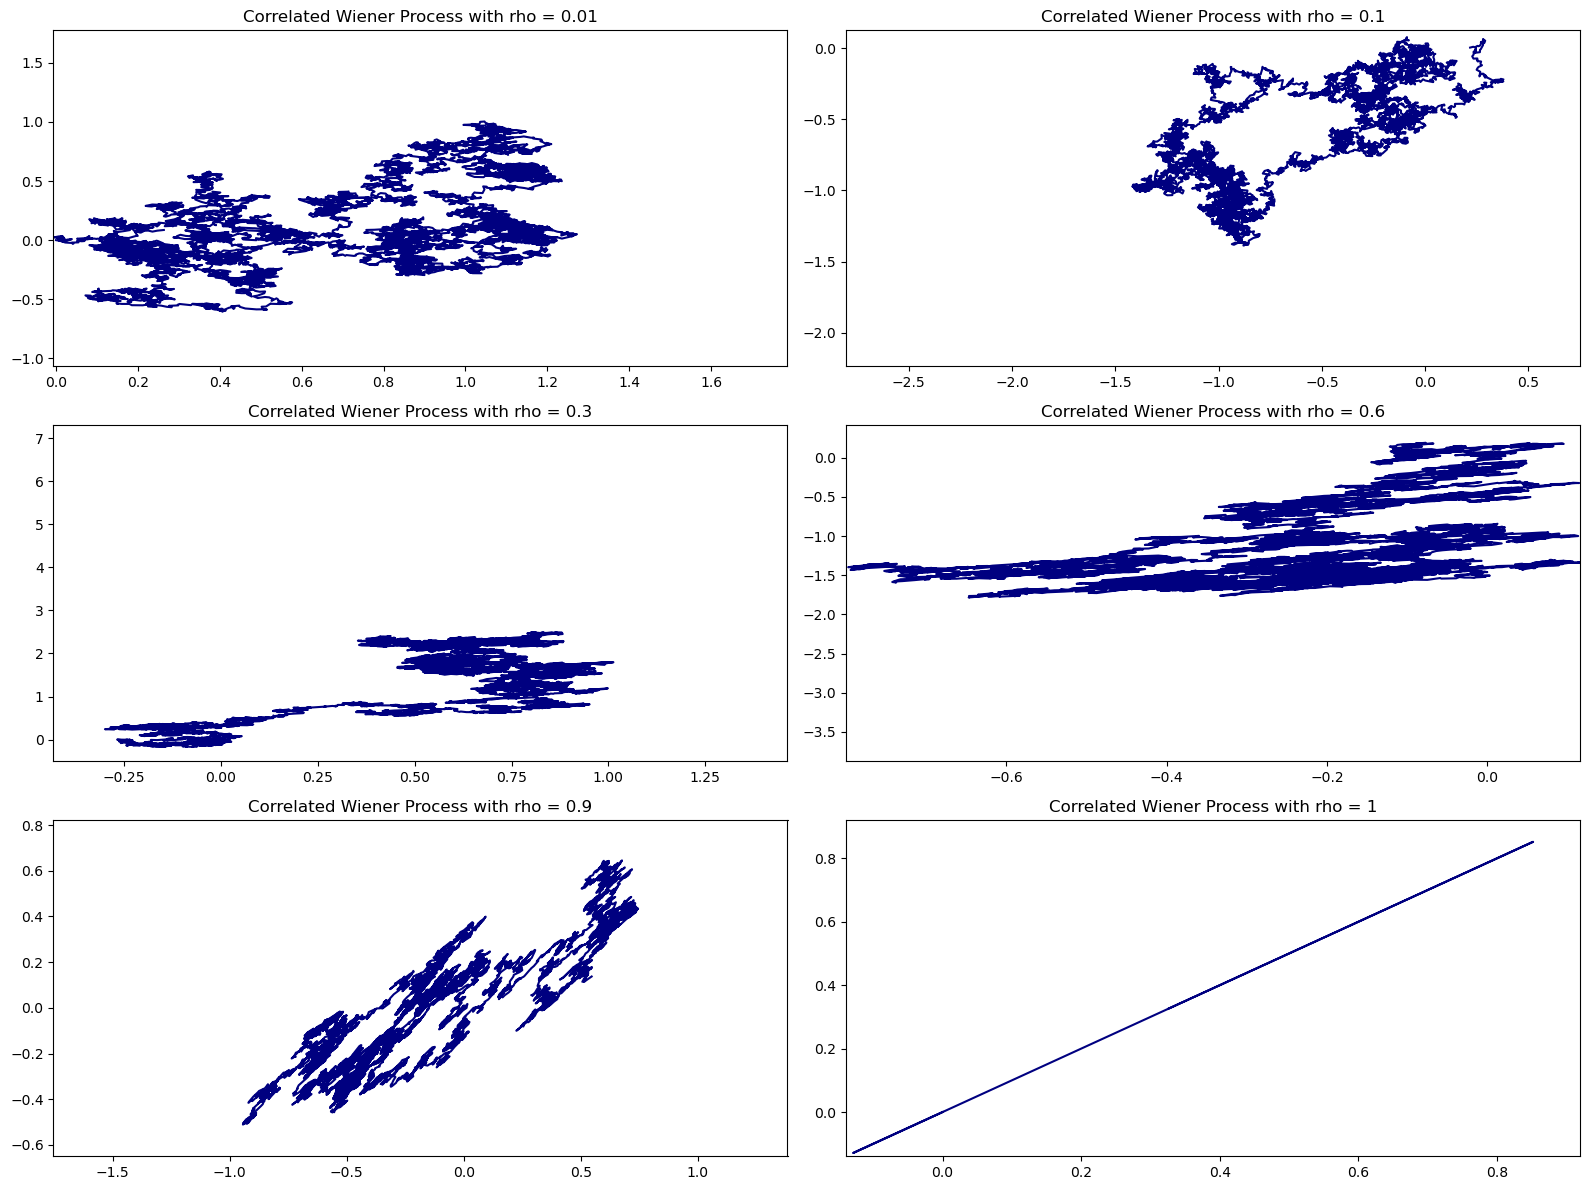

In [65]:
rhos = [0.01, 0.1, 0.3, 0.6, 0.9, 1]

fig, axs = plt.subplots(len(rhos) // 2, 2, figsize=(16, 8 * len(rhos) / 4))
axs = axs.flatten()
for i, rho in enumerate(rhos):
    plt.sca(axs[i])
    plot_correlated_wiener(T, n, rho)
    axs[i].set_title(f"Correlated Wiener Process with rho = {rho}")
plt.tight_layout()

$\rho$ cannot be function of time $t$ - it must be constant, as we need to satisfy stationary of increments.

#### d-dimensional Wiener process

In [86]:
def generate_d_wiener(T: float, n: int, d: int, corr_matrix: np.ndarray):
    assert corr_matrix.shape == (d, d), "Correlation matrix must be d x d."
    assert np.all(np.linalg.eigvals(corr_matrix) > 0), "Correlation matrix must be positive definite."

    dt = T / n
    t = np.linspace(0, T, n)
    
    # Here we use built-in cholesky decomposition function
    A = np.linalg.cholesky(corr_matrix)
    Z = np.random.normal(0, 1, size=(d, n-1))
    dW = np.sqrt(dt) * A @ Z  
    
    W = np.zeros((d, n))
    W[:, 1:] = np.cumsum(dW, axis=1)
    
    return t, W

Example: 2D

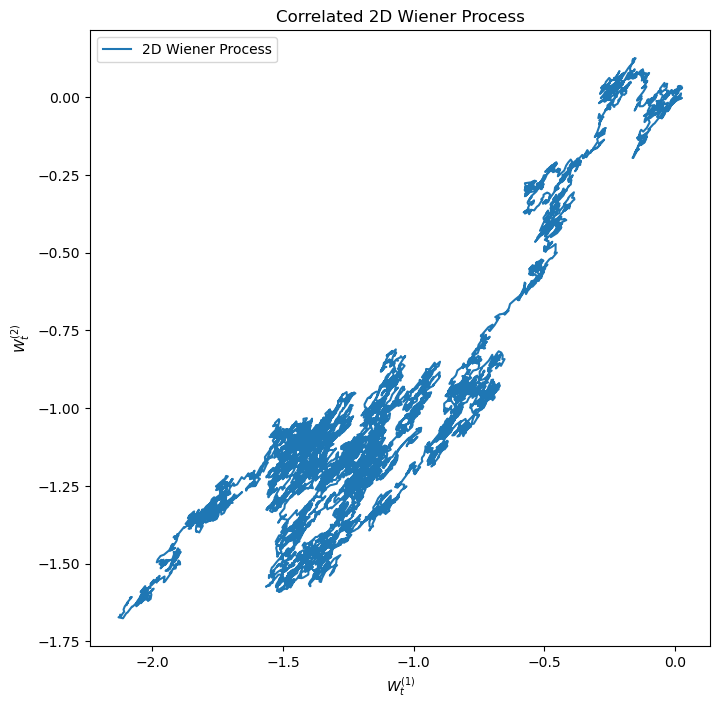

In [91]:
T, n, d = 1, 10_000, 2  
corr_matrix = np.array([[1, 0.8], [0.8, 1]])

t, W = generate_d_wiener(T, n, d, corr_matrix)

plt.figure(figsize=(8, 8))
plt.plot(W[0], W[1], label="2D Wiener Process")
plt.xlabel("$W_t^{(1)}$")
plt.ylabel("$W_t^{(2)}$")
plt.title("Correlated 2D Wiener Process")
plt.legend()
plt.show()

Example: 3D  
*example by ChatGPT*

In [92]:
T, n, d = 1, 10_000, 3
corr_matrix_3d = np.array([[1, 0.8, 0.5], 
                            [0.8, 1, 0.3], 
                            [0.5, 0.3, 1]])  

t, w3d = generate_d_wiener(T, n, d, corr_matrix_3d)
fig = px.line_3d(x=w3d[0], y=w3d[1], z=w3d[2])
fig.show()

### LLN

(e) We would like to verify the LLNs (weak, strong and an array of random samples that do not converge).

**Strong LLN**  

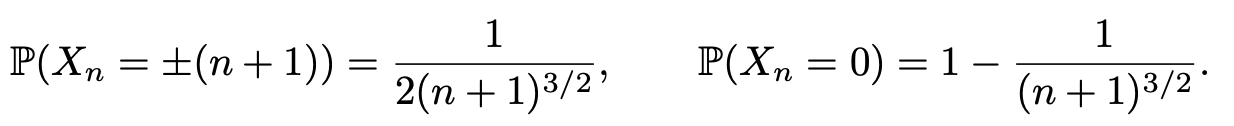

In [66]:
def generate_x(n: int):
    u = np.random.uniform(0,1)
    if u <= 1/(2*(n+1)**1.5):
        v= np.random.uniform(0,1)
        return n+1 if v<0.5 else -n-1
    else:
        return 0

**Weak LLN**

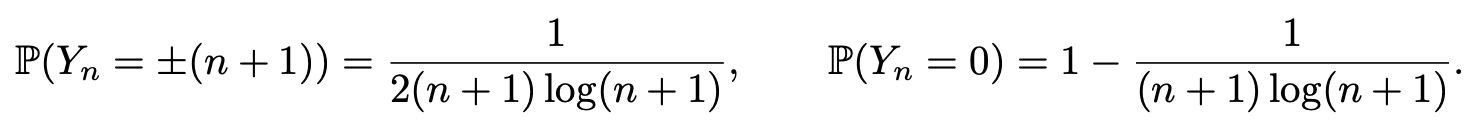

In [67]:
def generate_y(n: int):
    u = np.random.uniform(0,1)
    if u <= 1/(2*(n+1)*np.log(n+1)):
        v= np.random.uniform(0,1)
        return n+1 if v<0.5 else -n-1
    else:
        return 0

**No convergence**

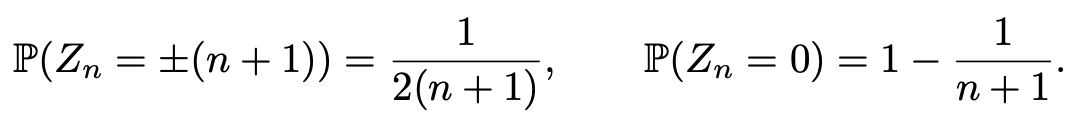

In [68]:
def generate_z(n:int):
    u = np.random.uniform(0,1)
    if u <= 1/(2*(n+1)):
        v= np.random.uniform(0,1)
        return n+1 if v<0.5 else -n-1
    else:
        return 0

In [69]:
def generate_means(n: int, dist: str = "x"):
    x = [0] * n
    if dist == "x":
        for i in range(n):
            x[i] = generate_x(i)
    elif dist == "y":
        for i in range(n):
            x[i] = generate_y(i)
    else:
        for i in range(n):
            x[i] = generate_z(i)
        
    x = np.array(x)
    sums = np.cumsum(x)
    means = [0] * n
    for i in range(len(sums)):
        means[i] = sums[i]/(i+1)
    
    return means 

In [82]:
def plot_lln(dist, n, n_samples):
    assert dist in ["x", "y", "z"], "Choose distribution from x, y or z."
    x = range(n)
    colors = ["lightskyblue", "lightgreen", "silver", "thistle"]

    plt.figure(figsize=(20,10))
    for _ in range(n_samples):
        y = generate_means(n, dist)
        plt.plot(x, y, color=np.random.choice(colors))
        
    if dist == "x":
        plt.title("Strong LLN")
    elif dist == "y":
        plt.title("Weak LLN")
    else: 
        plt.title("No convergence")
    plt.axhline(y=1, color='red', linestyle='--')
    plt.axhline(y=-1, color='red', linestyle='--')
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


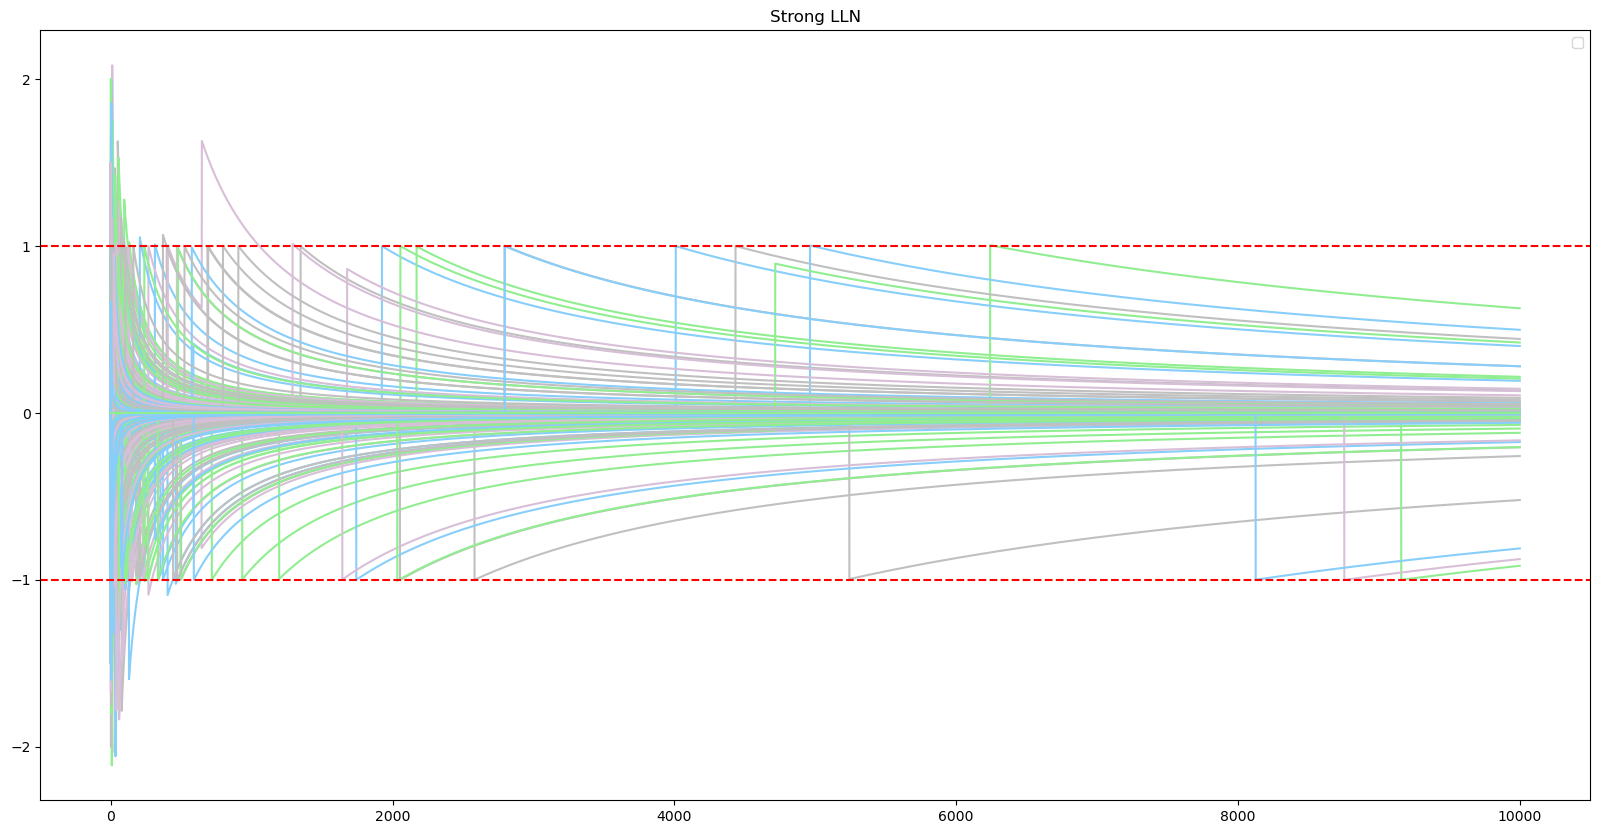

In [83]:
plot_lln("x", 10_000, 1000)

/var/folders/3h/472d34x91dd8vpqfg3cg45qh0000gn/T/ipykernel_92872/1589685671.py:3: RuntimeWarning:

divide by zero encountered in scalar divide

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


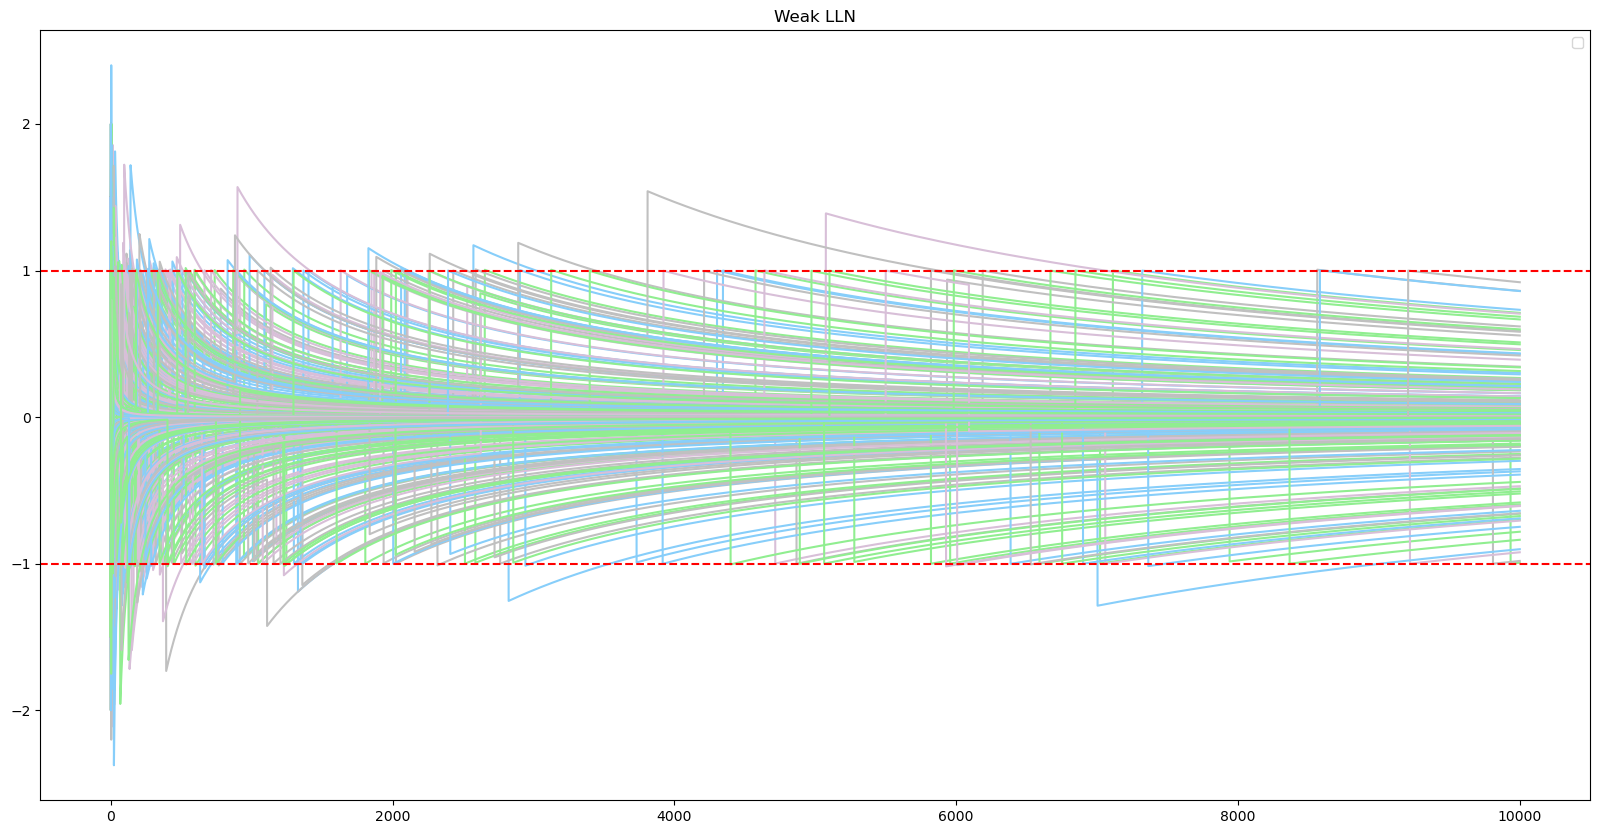

In [84]:
plot_lln("y", 10_000, 1000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


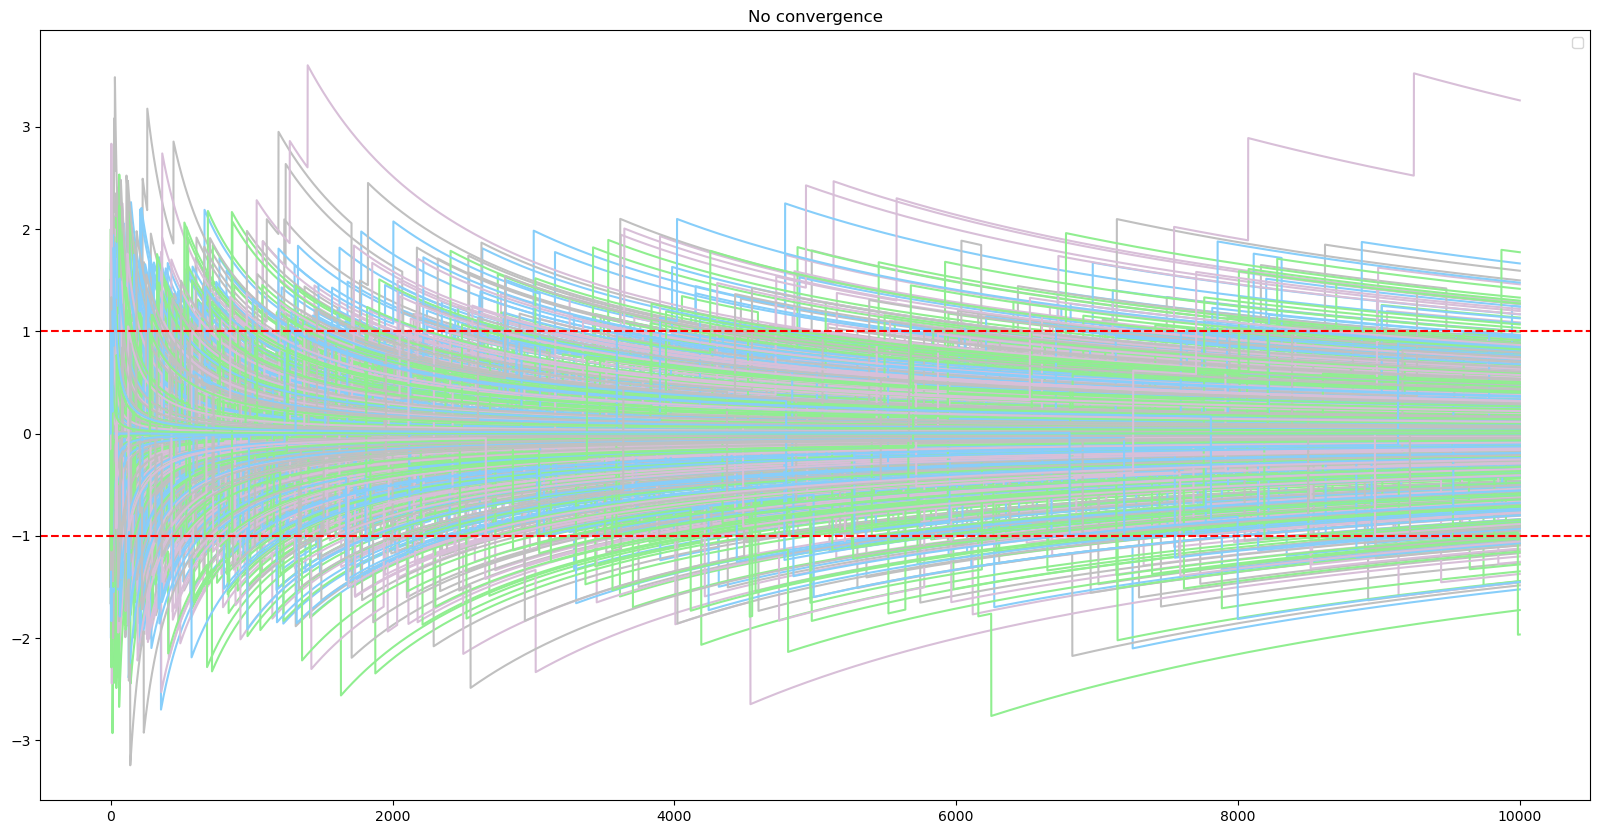

In [85]:
plot_lln("z", 10_000, 1000)

### (f) Law of iterated logarithm 

We will empirically verify the law of iterated logarithm.

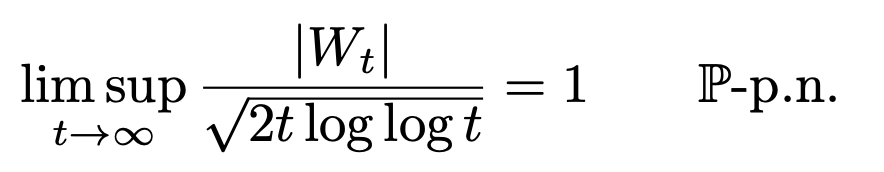

In [72]:
def plot_lil(T: float, n: int, k_processes: int = 1, log_scale: bool = False):
    wieners = [None] * k_processes
    for i in range(k_processes):
        w = wiener(T, n)
        w = np.array(w)
        wieners[i] = w
    
    interval = T/n
    t = np.array([(interval * i) for i in range(n)])
    
    index = np.where(t > np.exp(1))[0][0]
    t = t[index:]
        
    f = [0] * len(t)
    
    for i in range(1, len(t)):
        f[i] = np.sqrt(t[i] * 2 * np.log(np.log(t[i])))
        
    minus_f = [-x for x in f]

    plt.figure(figsize=(20,10))
    if log_scale:
        plt.xscale('log')
    for i in range(k_processes):
        plt.plot(t, wieners[i][index:], color="skyblue")
    plt.plot(t, f, color="black")
    plt.plot(t, minus_f, color="black")
    plt.legend()
    
    

Note that np.log(np.log(t)) makes sense only if outer logarithm returns a positive value and this happens only if inner logarithm returns sth positive. Therefore log(t) > 1 and t > 1. Therefore: t > e

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


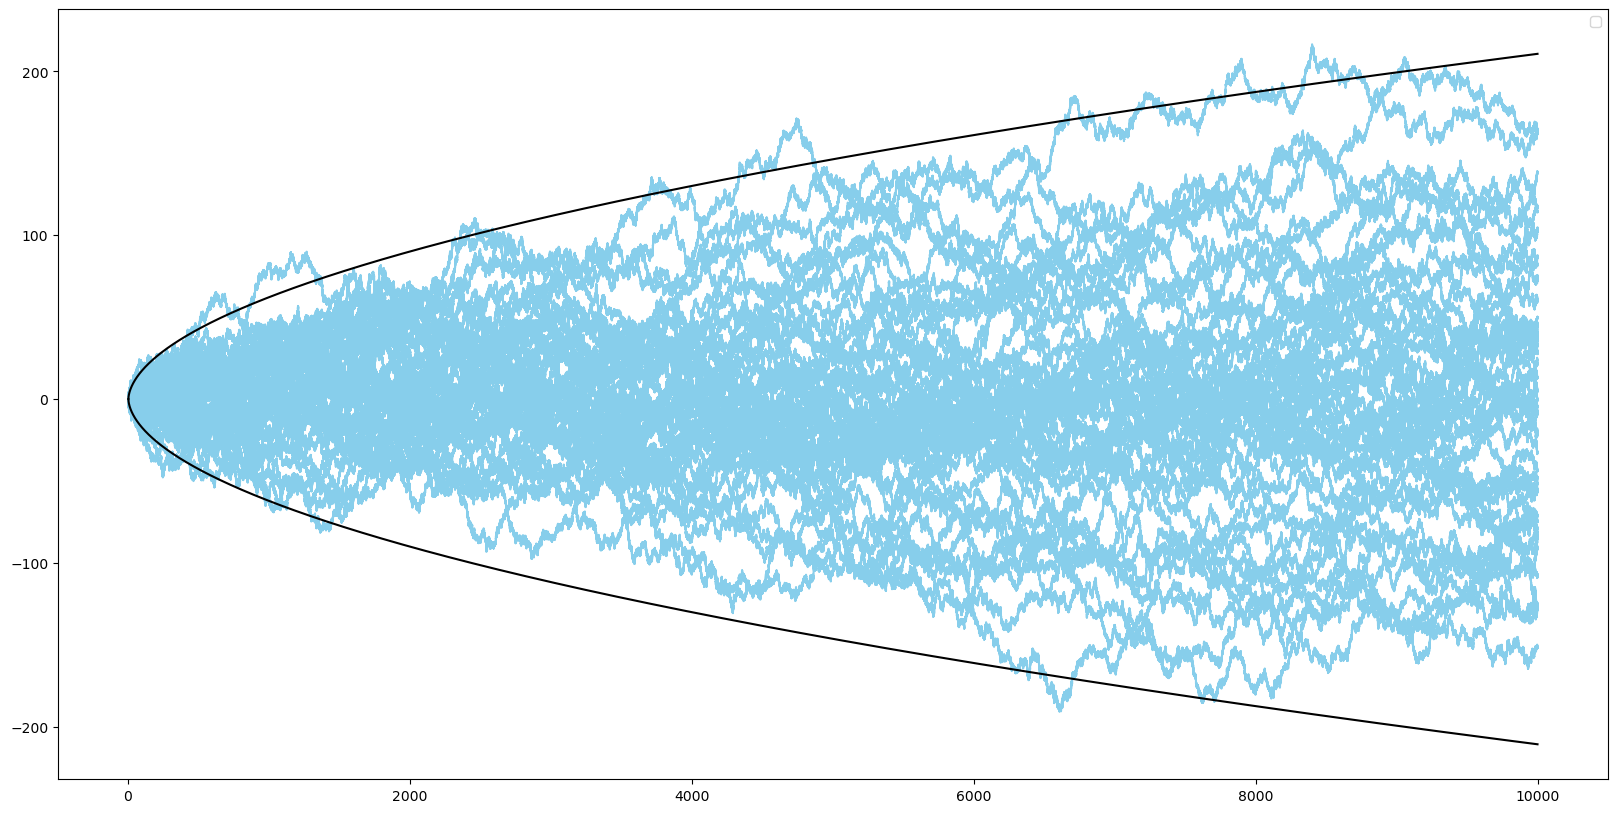

In [ ]:
plot_lil(10_000, 1_000_000, k_processes=50)

And with the log scale.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


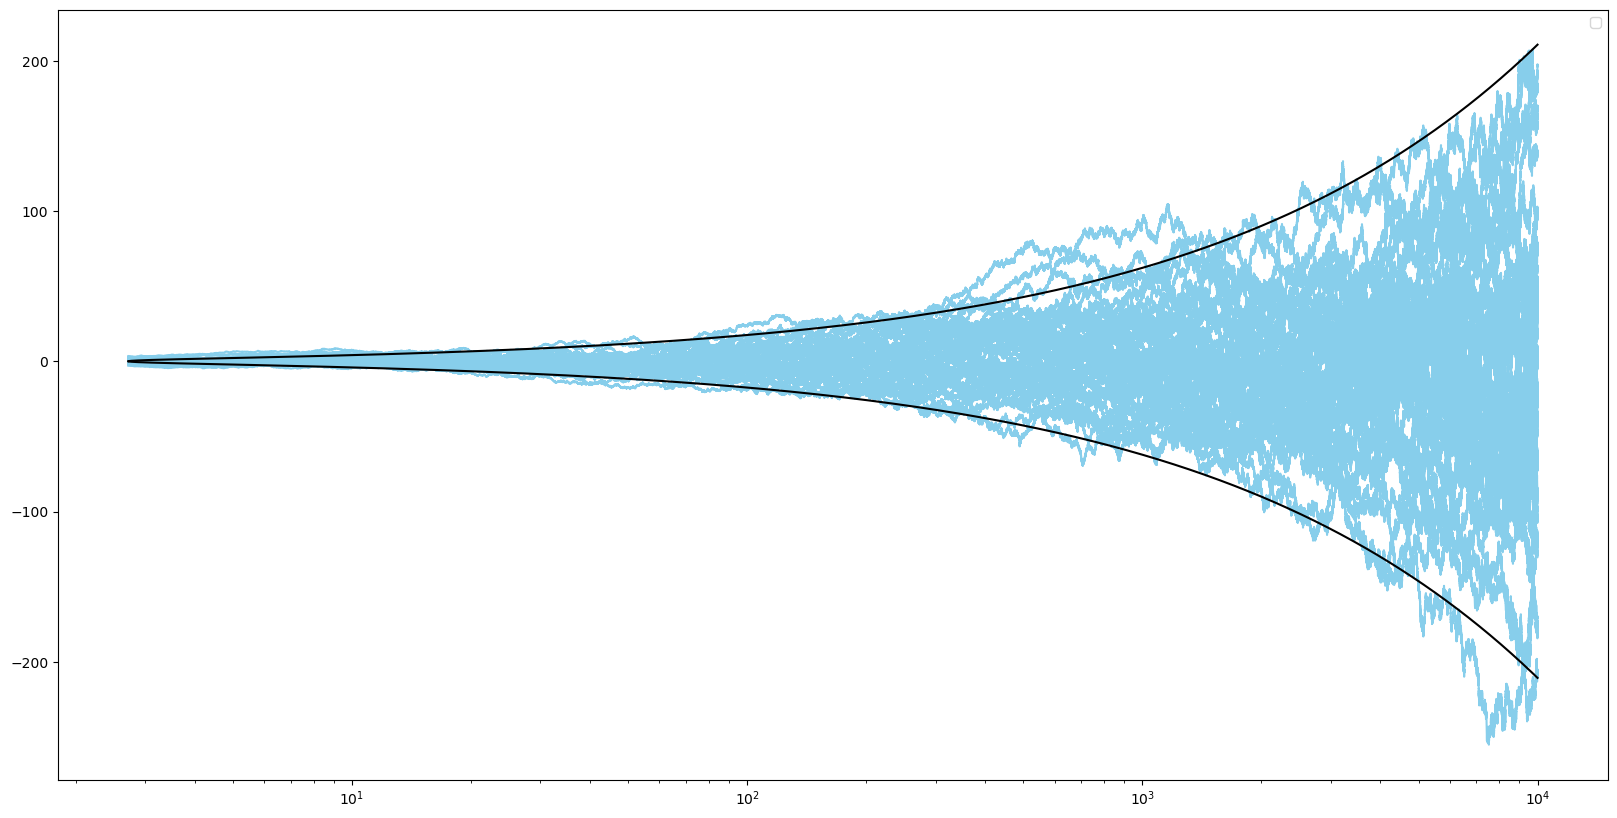

In [73]:
plot_lil(10_000, 1_000_000, k_processes=50, log_scale=True)

## Conclusions
- Generating Wiener process using Cholesky decomposition is time-consuming (as Cholesky algorithm is of O(n^3) complexity). 
- For random variable sequence satisfying strong LLN (Xn), (almost) all trajectories individually converge to 0. 
- For random variable sequence satisfying weak LLN (Yn) not all trajectories converge to 0. However, the bigger n, the fewer trajectories "increase".
- For random variable sequence that do not converge (Zn), nothing specifically changes as n increases.